In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import pickle
import os


In [2]:
df = pd.read_excel("../data/Customer_Data.xlsx", index_col="Customer_ID")
df

,Gender,Age_Category,Married,State,Number_of_Referals_group,Tenure,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Churn_Status
Customer_ID,,,,,,,,,,,,,,,,,,,,,
11098-MAD,Female,30-39,Yes,Madhya Pradesh,0-4,Long Term,Deal 1,Yes,No,Yes,...,951,66834,0,0,63172,731512,Stayed,NaN,NaN,0
11114-PUN,Male,50-59,No,Punjab,5-9,Short Term,Deal 5,Yes,No,Yes,...,4915,16905,0,10,12237,30142,Churned,Competitor,Competitor had better devices,1
11167-WES,Female,40-49,Yes,West Bengal,0-4,Long Term,Deal 1,Yes,Yes,Yes,...,11605,82975,4257,110,187298,1023791,Stayed,NaN,NaN,0
11179-MAH,Male,30-39,No,Maharashtra,10-14,Short Term,NaN,Yes,No,Yes,...,844,59693,0,0,21939,618869,Stayed,NaN,NaN,0
11180-TAM,Male,70-79,Yes,Tamil Nadu,10-14,Long Term,Deal 2,Yes,No,Yes,...,726,408435,0,140,33208,455643,Stayed,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912-WES,Female,60-69,Yes,West Bengal,10-14,Long Term,Deal 4,Yes,No,No,...,1965,2448,0,0,43069,67549,Stayed,NaN,NaN,0
99942-KER,Male,60-69,Yes,Kerala,5-9,Medium Term,NaN,Yes,No,Yes,...,697,697,0,0,2152,9122,Churned,Attitude,Attitude of service provider,1
99942-TEL,Female,30-39,No,Telangana,0-4,Long Term,NaN,Yes,Yes,Yes,...,709,46771,0,0,188002,655712,Stayed,NaN,NaN,0


In [3]:
# For convenience I will rename columns to lower case lettering.
df.rename(columns= lambda x: x.lower(), inplace=True)
df

,gender,age_category,married,state,number_of_referals_group,tenure,value_deal,phone_service,multiple_lines,internet_service,...,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,churn_status
Customer_ID,,,,,,,,,,,,,,,,,,,,,
11098-MAD,Female,30-39,Yes,Madhya Pradesh,0-4,Long Term,Deal 1,Yes,No,Yes,...,951,66834,0,0,63172,731512,Stayed,NaN,NaN,0
11114-PUN,Male,50-59,No,Punjab,5-9,Short Term,Deal 5,Yes,No,Yes,...,4915,16905,0,10,12237,30142,Churned,Competitor,Competitor had better devices,1
11167-WES,Female,40-49,Yes,West Bengal,0-4,Long Term,Deal 1,Yes,Yes,Yes,...,11605,82975,4257,110,187298,1023791,Stayed,NaN,NaN,0
11179-MAH,Male,30-39,No,Maharashtra,10-14,Short Term,NaN,Yes,No,Yes,...,844,59693,0,0,21939,618869,Stayed,NaN,NaN,0
11180-TAM,Male,70-79,Yes,Tamil Nadu,10-14,Long Term,Deal 2,Yes,No,Yes,...,726,408435,0,140,33208,455643,Stayed,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912-WES,Female,60-69,Yes,West Bengal,10-14,Long Term,Deal 4,Yes,No,No,...,1965,2448,0,0,43069,67549,Stayed,NaN,NaN,0
99942-KER,Male,60-69,Yes,Kerala,5-9,Medium Term,NaN,Yes,No,Yes,...,697,697,0,0,2152,9122,Churned,Attitude,Attitude of service provider,1
99942-TEL,Female,30-39,No,Telangana,0-4,Long Term,NaN,Yes,Yes,Yes,...,709,46771,0,0,188002,655712,Stayed,NaN,NaN,0


In [4]:
df.describe()

,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_status
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6.418000e+03,6418.000000
mean,3474.564662,126067.161888,179.503428,6.718604,56724.390620,2.531825e+05,0.269866
std,3634.460456,192529.419322,759.544907,24.722533,78854.595917,2.813676e+05,0.443925
min,-10.000000,19.000000,0.000000,0.000000,0.000000,3.500000e+01,0.000000
25%,611.250000,7447.000000,0.000000,0.000000,2754.750000,2.646275e+04,0.000000
50%,1146.000000,36381.500000,0.000000,0.000000,17950.000000,1.336520e+05,0.000000
75%,6995.000000,143077.500000,0.000000,0.000000,83276.750000,4.060930e+05,1.000000
max,11875.000000,867245.000000,4979.000000,150.000000,356472.000000,1.197934e+06,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6418 entries, 11098-MAD to 99996-HAR
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       6418 non-null   object
 1   age_category                 6418 non-null   object
 2   married                      6418 non-null   object
 3   state                        6418 non-null   object
 4   number_of_referals_group     6418 non-null   object
 5   tenure                       6418 non-null   object
 6   value_deal                   2870 non-null   object
 7   phone_service                6418 non-null   object
 8   multiple_lines               5796 non-null   object
 9   internet_service             6418 non-null   object
 10  internet_type                5028 non-null   object
 11  online_security              5028 non-null   object
 12  online_backup                5028 non-null   object
 13  device_protection_plan   

In [6]:
# Next is to find out if there are complete zero rows in our data.

zero_mask = df == 0

In [7]:
feat_zero_mask = zero_mask.iloc[:,1:].all(axis=1)
sum(feat_zero_mask)

0

So we have no complete Zero rows which is helpful for our model

## Dropping irrelevant columns

In [10]:
df = df.drop(['churn_category', 'churn_reason', 'customer_status'], axis=1)
df

,gender,age_category,married,state,number_of_referals_group,tenure,value_deal,phone_service,multiple_lines,internet_service,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_status
Customer_ID,,,,,,,,,,,,,,,,,,,,,
11098-MAD,Female,30-39,Yes,Madhya Pradesh,0-4,Long Term,Deal 1,Yes,No,Yes,...,2 Years,No,Bank Withdrawal,951,66834,0,0,63172,731512,0
11114-PUN,Male,50-59,No,Punjab,5-9,Short Term,Deal 5,Yes,No,Yes,...,Monthly,Yes,Bank Withdrawal,4915,16905,0,10,12237,30142,1
11167-WES,Female,40-49,Yes,West Bengal,0-4,Long Term,Deal 1,Yes,Yes,Yes,...,2 Years,Yes,Bank Withdrawal,11605,82975,4257,110,187298,1023791,0
11179-MAH,Male,30-39,No,Maharashtra,10-14,Short Term,NaN,Yes,No,Yes,...,2 Years,Yes,Credit Card,844,59693,0,0,21939,618869,0
11180-TAM,Male,70-79,Yes,Tamil Nadu,10-14,Long Term,Deal 2,Yes,No,Yes,...,2 Years,Yes,Credit Card,726,408435,0,140,33208,455643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912-WES,Female,60-69,Yes,West Bengal,10-14,Long Term,Deal 4,Yes,No,No,...,1 Year,No,Bank Withdrawal,1965,2448,0,0,43069,67549,0
99942-KER,Male,60-69,Yes,Kerala,5-9,Medium Term,NaN,Yes,No,Yes,...,Monthly,No,Bank Withdrawal,697,697,0,0,2152,9122,1
99942-TEL,Female,30-39,No,Telangana,0-4,Long Term,NaN,Yes,Yes,Yes,...,2 Years,No,Credit Card,709,46771,0,0,188002,655712,0


## Extracting columns with String data type

In [12]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,gender,age_category,married,state,number_of_referals_group,tenure,value_deal,phone_service,multiple_lines,internet_service,...,online_backup,device_protection_plan,premium_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method
Customer_ID,,,,,,,,,,,,,,,,,,,,,
11098-MAD,Female,30-39,Yes,Madhya Pradesh,0-4,Long Term,Deal 1,Yes,No,Yes,...,Yes,No,Yes,No,Yes,Yes,Yes,2 Years,No,Bank Withdrawal
11114-PUN,Male,50-59,No,Punjab,5-9,Short Term,Deal 5,Yes,No,Yes,...,No,Yes,No,No,No,No,No,Monthly,Yes,Bank Withdrawal
11167-WES,Female,40-49,Yes,West Bengal,0-4,Long Term,Deal 1,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,2 Years,Yes,Bank Withdrawal
11179-MAH,Male,30-39,No,Maharashtra,10-14,Short Term,NaN,Yes,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2 Years,Yes,Credit Card
11180-TAM,Male,70-79,Yes,Tamil Nadu,10-14,Long Term,Deal 2,Yes,No,Yes,...,No,No,Yes,Yes,Yes,No,No,2 Years,Yes,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912-WES,Female,60-69,Yes,West Bengal,10-14,Long Term,Deal 4,Yes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 Year,No,Bank Withdrawal
99942-KER,Male,60-69,Yes,Kerala,5-9,Medium Term,NaN,Yes,No,Yes,...,No,No,No,No,No,No,Yes,Monthly,No,Bank Withdrawal
99942-TEL,Female,30-39,No,Telangana,0-4,Long Term,NaN,Yes,Yes,Yes,...,Yes,Yes,Yes,No,No,No,Yes,2 Years,No,Credit Card


In [13]:
cat_cols.isnull().sum()

gender                         0
age_category                   0
married                        0
state                          0
number_of_referals_group       0
tenure                         0
value_deal                  3548
phone_service                  0
multiple_lines               622
internet_service               0
internet_type               1390
online_security             1390
online_backup               1390
device_protection_plan      1390
premium_support             1390
streaming_tv                1390
streaming_movies            1390
streaming_music             1390
unlimited_data              1390
contract                       0
paperless_billing              0
payment_method                 0
dtype: int64

In [14]:
#filled_catcols = cat_cols.fillna('')

In [15]:
cat_cols.value_deal.value_counts()

value_deal
Deal 2    758
Deal 5    738
Deal 4    540
Deal 1    469
Deal 3    365
Name: count, dtype: int64

In [16]:
cat_cols['value_deal'].unique()

array(['Deal 1', 'Deal 5', nan, 'Deal 2', 'Deal 3', 'Deal 4'],
      dtype=object)

## Replacing Missing Entries

In [18]:
cat_cols['value_deal'] = cat_cols['value_deal'].fillna('others')

In [19]:
cat_cols.value_deal.unique()

array(['Deal 1', 'Deal 5', 'others', 'Deal 2', 'Deal 3', 'Deal 4'],
      dtype=object)

In [20]:
cat_cols.isnull().sum()

gender                         0
age_category                   0
married                        0
state                          0
number_of_referals_group       0
tenure                         0
value_deal                     0
phone_service                  0
multiple_lines               622
internet_service               0
internet_type               1390
online_security             1390
online_backup               1390
device_protection_plan      1390
premium_support             1390
streaming_tv                1390
streaming_movies            1390
streaming_music             1390
unlimited_data              1390
contract                       0
paperless_billing              0
payment_method                 0
dtype: int64

In [21]:
## Replace missing  values in 'Multiple_lines' column

cat_cols['multiple_lines'] = cat_cols['multiple_lines'].fillna('No')
cat_cols.isnull().sum()

gender                         0
age_category                   0
married                        0
state                          0
number_of_referals_group       0
tenure                         0
value_deal                     0
phone_service                  0
multiple_lines                 0
internet_service               0
internet_type               1390
online_security             1390
online_backup               1390
device_protection_plan      1390
premium_support             1390
streaming_tv                1390
streaming_movies            1390
streaming_music             1390
unlimited_data              1390
contract                       0
paperless_billing              0
payment_method                 0
dtype: int64

In [22]:
cat_cols['multiple_lines'].mode()

0    No
Name: multiple_lines, dtype: object

In [23]:
cat_cols['multiple_lines'].value_counts()

multiple_lines
No     3704
Yes    2714
Name: count, dtype: int64

In [24]:
cat_cols['multiple_lines'].unique()

array(['No', 'Yes'], dtype=object)

Now since we are left with boolean columns, That is, columns with either 'Yes' or 'No' as entries.
We can collect them together and fill the missing values with the model score.

In [26]:
cat_cols.isnull().sum()

gender                         0
age_category                   0
married                        0
state                          0
number_of_referals_group       0
tenure                         0
value_deal                     0
phone_service                  0
multiple_lines                 0
internet_service               0
internet_type               1390
online_security             1390
online_backup               1390
device_protection_plan      1390
premium_support             1390
streaming_tv                1390
streaming_movies            1390
streaming_music             1390
unlimited_data              1390
contract                       0
paperless_billing              0
payment_method                 0
dtype: int64

In [27]:
# We define a function to replace "NAN" entries with the modal value.

def fill_mode(df, col_name):
    
    # find the modal value
    modal_val = df[col_name].mode()[0]
    
    #Replace "nan" values with the modal value
    df[col_name + "_fill"] = df[col_name]
    df[col_name + "_fill"].fillna(modal_val, inplace=True)
    
    #Call function to fill with the modal value
    
for col in ["internet_type", "online_security", "online_backup", "device_protection_plan", 'premium_support',
           'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']:
    fill_mode(cat_cols, col)
    
# Display impute result
cat_cols[["internet_type", "online_security", "online_backup", "device_protection_plan", "premium_support",
           "streaming_tv", "streaming_movies", "streaming_music", "unlimited_data"]].head()

# Drop actual columns
new_catcols = cat_cols.drop(["internet_type", "online_security", "online_backup", "device_protection_plan", "premium_support",
           "streaming_tv", "streaming_movies", "streaming_music", "unlimited_data"], axis=1)

C:\Users\nenec\AppData\Local\Temp\ipykernel_28552\3609042115.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name + "_fill"].fillna(modal_val, inplace=True)
C:\Users\nenec\AppData\Local\Temp\ipykernel_28552\3609042115.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [28]:
new_catcols.isnull().sum()

gender                         0
age_category                   0
married                        0
state                          0
number_of_referals_group       0
tenure                         0
value_deal                     0
phone_service                  0
multiple_lines                 0
internet_service               0
contract                       0
paperless_billing              0
payment_method                 0
internet_type_fill             0
online_security_fill           0
online_backup_fill             0
device_protection_plan_fill    0
premium_support_fill           0
streaming_tv_fill              0
streaming_movies_fill          0
streaming_music_fill           0
unlimited_data_fill            0
dtype: int64

In [29]:
new_catcols.gender.value_counts()

gender
Female    4048
Male      2370
Name: count, dtype: int64

## Encoding the Categorical columns

In [31]:
for col in new_catcols:
    le = LabelEncoder()
    new_catcols[col] = le.fit_transform(new_catcols[col])

In [32]:
new_catcols.columns

Index(['gender', 'age_category', 'married', 'state',
       'number_of_referals_group', 'tenure', 'value_deal', 'phone_service',
       'multiple_lines', 'internet_service', 'contract', 'paperless_billing',
       'payment_method', 'internet_type_fill', 'online_security_fill',
       'online_backup_fill', 'device_protection_plan_fill',
       'premium_support_fill', 'streaming_tv_fill', 'streaming_movies_fill',
       'streaming_music_fill', 'unlimited_data_fill'],
      dtype='object')

In [33]:
## Extracting Numeric Columns
num_cols = df.select_dtypes(include=['int'])
num_cols

,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_status
Customer_ID,,,,,,,
11098-MAD,951,66834,0,0,63172,731512,0
11114-PUN,4915,16905,0,10,12237,30142,1
11167-WES,11605,82975,4257,110,187298,1023791,0
11179-MAH,844,59693,0,0,21939,618869,0
11180-TAM,726,408435,0,140,33208,455643,0
...,...,...,...,...,...,...,...
99912-WES,1965,2448,0,0,43069,67549,0
99942-KER,697,697,0,0,2152,9122,1
99942-TEL,709,46771,0,0,188002,655712,0


In [34]:
num_cols.isnull().sum()

monthly_charge                 0
total_charges                  0
total_refunds                  0
total_extra_data_charges       0
total_long_distance_charges    0
total_revenue                  0
churn_status                   0
dtype: int64

In [35]:
new_catcols

,gender,age_category,married,state,number_of_referals_group,tenure,value_deal,phone_service,multiple_lines,internet_service,...,payment_method,internet_type_fill,online_security_fill,online_backup_fill,device_protection_plan_fill,premium_support_fill,streaming_tv_fill,streaming_movies_fill,streaming_music_fill,unlimited_data_fill
Customer_ID,,,,,,,,,,,,,,,,,,,,,
11098-MAD,0,1,1,11,0,0,0,1,0,1,...,0,2,1,1,0,1,0,1,1,1
11114-PUN,1,3,0,15,3,2,4,1,0,1,...,0,1,0,0,1,0,0,0,0,0
11167-WES,0,2,1,21,0,0,0,1,1,1,...,0,2,1,1,1,1,1,1,1,0
11179-MAH,1,1,0,12,1,2,5,1,0,1,...,1,1,1,1,1,1,1,1,1,1
11180-TAM,1,5,1,17,1,0,1,1,0,1,...,1,1,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912-WES,0,4,1,21,1,0,3,1,0,0,...,0,2,0,0,0,0,0,0,0,1
99942-KER,1,4,1,10,3,1,5,1,0,1,...,0,2,0,0,0,0,0,0,0,1
99942-TEL,0,1,0,18,0,0,5,1,1,1,...,1,1,1,1,1,1,0,0,0,1


## Merging the New_catcol and num_cols dataframes

In [37]:
# We will now concatenate the new_catcols and num_cols dataframe to new dataframe called "data"

data = pd.concat([new_catcols, num_cols], axis=1)
data

,gender,age_category,married,state,number_of_referals_group,tenure,value_deal,phone_service,multiple_lines,internet_service,...,streaming_movies_fill,streaming_music_fill,unlimited_data_fill,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_status
Customer_ID,,,,,,,,,,,,,,,,,,,,,
11098-MAD,0,1,1,11,0,0,0,1,0,1,...,1,1,1,951,66834,0,0,63172,731512,0
11114-PUN,1,3,0,15,3,2,4,1,0,1,...,0,0,0,4915,16905,0,10,12237,30142,1
11167-WES,0,2,1,21,0,0,0,1,1,1,...,1,1,0,11605,82975,4257,110,187298,1023791,0
11179-MAH,1,1,0,12,1,2,5,1,0,1,...,1,1,1,844,59693,0,0,21939,618869,0
11180-TAM,1,5,1,17,1,0,1,1,0,1,...,1,0,0,726,408435,0,140,33208,455643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912-WES,0,4,1,21,1,0,3,1,0,0,...,0,0,1,1965,2448,0,0,43069,67549,0
99942-KER,1,4,1,10,3,1,5,1,0,1,...,0,0,1,697,697,0,0,2152,9122,1
99942-TEL,0,1,0,18,0,0,5,1,1,1,...,0,0,1,709,46771,0,0,188002,655712,0


Now we are done with data preparation, we now move to Feature Engineering.

We can save this new data as csv file

In [39]:
data.to_csv('telecomm_data.csv', index=False)

# Feature Engineering

In [41]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X

,gender,age_category,married,state,number_of_referals_group,tenure,value_deal,phone_service,multiple_lines,internet_service,...,streaming_tv_fill,streaming_movies_fill,streaming_music_fill,unlimited_data_fill,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
Customer_ID,,,,,,,,,,,,,,,,,,,,,
11098-MAD,0,1,1,11,0,0,0,1,0,1,...,0,1,1,1,951,66834,0,0,63172,731512
11114-PUN,1,3,0,15,3,2,4,1,0,1,...,0,0,0,0,4915,16905,0,10,12237,30142
11167-WES,0,2,1,21,0,0,0,1,1,1,...,1,1,1,0,11605,82975,4257,110,187298,1023791
11179-MAH,1,1,0,12,1,2,5,1,0,1,...,1,1,1,1,844,59693,0,0,21939,618869
11180-TAM,1,5,1,17,1,0,1,1,0,1,...,1,1,0,0,726,408435,0,140,33208,455643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912-WES,0,4,1,21,1,0,3,1,0,0,...,0,0,0,1,1965,2448,0,0,43069,67549
99942-KER,1,4,1,10,3,1,5,1,0,1,...,0,0,0,1,697,697,0,0,2152,9122
99942-TEL,0,1,0,18,0,0,5,1,1,1,...,0,0,0,1,709,46771,0,0,188002,655712


In [42]:
## Let's find out what features in our dataset correlates with the Target feature.

data.corr()['churn_status'][:-1]

gender                        -0.013516
age_category                   0.111908
married                       -0.009282
state                         -0.037905
number_of_referals_group       0.009713
tenure                        -0.001300
value_deal                     0.148302
phone_service                  0.005762
multiple_lines                 0.035941
internet_service               0.226771
contract                       0.378587
paperless_billing              0.191805
payment_method                -0.133859
internet_type_fill             0.067232
online_security_fill          -0.176067
online_backup_fill            -0.080439
device_protection_plan_fill   -0.069932
premium_support_fill          -0.166355
streaming_tv_fill              0.059069
streaming_movies_fill          0.061276
streaming_music_fill           0.045968
unlimited_data_fill           -0.055060
monthly_charge                 0.091933
total_charges                 -0.125550
total_refunds                 -0.037065


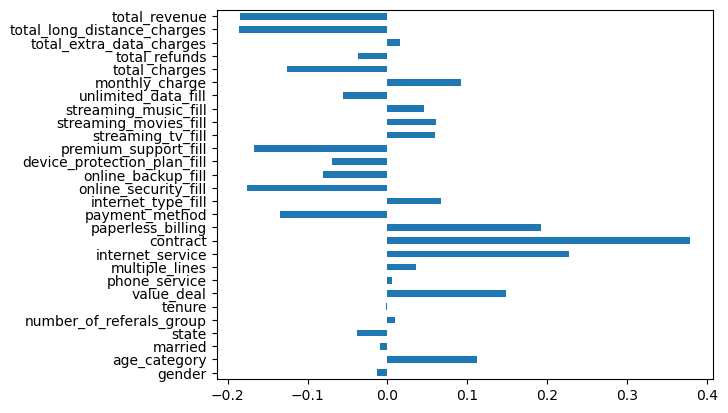

In [43]:
data.corr()['churn_status'][:-1].plot(kind='barh')
plt.show()

As we can see so, Contract, paperless_billing and internet_service have the highest positive correlation with the target variable

A correlation of +1 is considered a strong positve correlation while a correlation of -1 is considered strongly negatively correlated.

From the above snippet we notice that no feature has a strong correlation with the target variable.

In [47]:
## Taking a quick look at the distribution of the churn_status(Target variable)

In [48]:
y.value_counts(normalize=True)

churn_status
0    0.730134
1    0.269866
Name: proportion, dtype: float64

This means that approx. 73% of the customers have either stayed or joined the telecommunication company.

# Model Building

In [51]:
## Feature Scaling

#from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [52]:
#print(X_scaled.mean_)

In [53]:
# Splitting our data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

#Evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
def classification_model(model):
    #choose a model
    clf = model
    
    #fit the classifier to the data
    clf.fit(X_train, y_train)
    
    #predict the labels
    pred = clf.predict(X_test)
    
    #Get model cross validation score
    score = cross_val_score(clf, X_test, y_test, cv=5).mean()
    
    print('Confusion matrix:', confusion_matrix(y_test, pred))
    print('Classification report', classification_report(y_test, pred))
    print('Model accuracy:', accuracy_score(y_test, pred)*100)
    print('Cross Validation score:', score)
    
    #return the model
    return clf

In [56]:
classification_model(LogisticRegression())

C:\Users\nenec\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nenec\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Confusion matrix: [[1344   62]
 [ 465   55]]
Classification report               precision    recall  f1-score   support

           0       0.74      0.96      0.84      1406
           1       0.47      0.11      0.17       520

    accuracy                           0.73      1926
   macro avg       0.61      0.53      0.50      1926
weighted avg       0.67      0.73      0.66      1926

Model accuracy: 72.63759086188992
Cross Validation score: 0.7258663616176569


C:\Users\nenec\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
classification_model(RandomForestClassifier())

Confusion matrix: [[1300  106]
 [ 220  300]]
Classification report               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1406
           1       0.74      0.58      0.65       520

    accuracy                           0.83      1926
   macro avg       0.80      0.75      0.77      1926
weighted avg       0.82      0.83      0.82      1926

Model accuracy: 83.07372793354102
Cross Validation score: 0.815159141376758


RandomForestClassifier()

In [58]:
classification_model(DecisionTreeClassifier())

Confusion matrix: [[1145  261]
 [ 225  295]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1406
           1       0.53      0.57      0.55       520

    accuracy                           0.75      1926
   macro avg       0.68      0.69      0.69      1926
weighted avg       0.75      0.75      0.75      1926

Model accuracy: 74.76635514018692
Cross Validation score: 0.7487127380391629


DecisionTreeClassifier()

In [59]:
classification_model(KNeighborsClassifier())

Confusion matrix: [[1206  200]
 [ 336  184]]
Classification report               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1406
           1       0.48      0.35      0.41       520

    accuracy                           0.72      1926
   macro avg       0.63      0.61      0.61      1926
weighted avg       0.70      0.72      0.71      1926

Model accuracy: 72.17030114226375
Cross Validation score: 0.7076791602180204


KNeighborsClassifier()

In [60]:
classification_model(BernoulliNB())

Confusion matrix: [[1226  180]
 [ 260  260]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1406
           1       0.59      0.50      0.54       520

    accuracy                           0.77      1926
   macro avg       0.71      0.69      0.69      1926
weighted avg       0.76      0.77      0.77      1926

Model accuracy: 77.15472481827622
Cross Validation score: 0.771537581589395


BernoulliNB()

In [61]:
classification_model(GaussianNB())

Confusion matrix: [[795 611]
 [150 370]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.57      0.68      1406
           1       0.38      0.71      0.49       520

    accuracy                           0.60      1926
   macro avg       0.61      0.64      0.58      1926
weighted avg       0.72      0.60      0.63      1926

Model accuracy: 60.48805815160956
Cross Validation score: 0.5820388937487383


GaussianNB()

In [62]:
classification_model(SVC())

Confusion matrix: [[1406    0]
 [ 520    0]]
Classification report               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1406
           1       0.00      0.00      0.00       520

    accuracy                           0.73      1926
   macro avg       0.37      0.50      0.42      1926
weighted avg       0.53      0.73      0.62      1926

Model accuracy: 73.00103842159918
Cross Validation score: 0.7300100935334096


C:\Users\nenec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nenec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nenec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC()

So we notice that RandomForestClassifier is the best performing model with an accuracy score  approx. 83%

So we will take a closer look at the RandomForestClassifier model.

In [65]:
#choose a model
rf_clf = RandomForestClassifier()
    
#fit the classifier to the data
rf_clf.fit(X_train, y_train)
    
#predict the labels
pred = rf_clf.predict(X_test)
    
#Get model cross validation score
score = cross_val_score(rf_clf, X_test, y_test, cv=5).mean()

print('Confusion matrix:', confusion_matrix(y_test, pred))
print('Classification report', classification_report(y_test, pred))
print('Model accuracy:', accuracy_score(y_test, pred)*100)
print('Cross Validation score:', score)

Confusion matrix: [[1291  115]
 [ 221  299]]
Classification report               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1406
           1       0.72      0.57      0.64       520

    accuracy                           0.83      1926
   macro avg       0.79      0.75      0.76      1926
weighted avg       0.82      0.83      0.82      1926

Model accuracy: 82.55451713395638
Cross Validation score: 0.8193028732925105


### What features played an important role in our model's predictions?

## Feature Importance. 

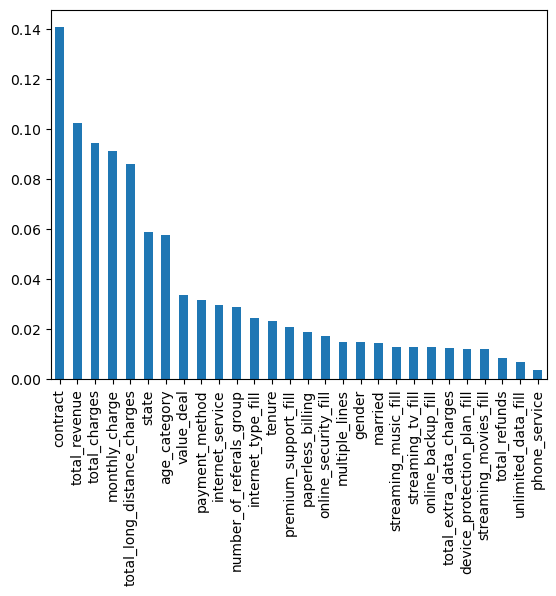

In [68]:
pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar');

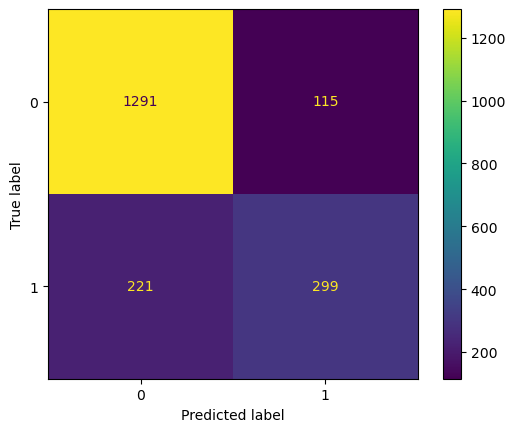

In [70]:
# Let's print the confusion matrix of the model
labels = data['churn_status'].unique()
cm = confusion_matrix(y_test, pred, labels=labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()

plt.show()

In [74]:
compare = pd.DataFrame({'rf_predictions': pred, 'Actual class': y_test})
compare[:10]

,rf_predictions,Actual class
Customer_ID,,
49302-GUJ,0,0
58765-HAR,0,0
16149-ASS,1,1
34072-WES,0,0
63904-ODI,0,0
28003-TAM,0,0
34212-MAH,0,0
83193-CHH,0,0
47492-AND,0,0


# Saving the model

In [77]:
# Save the model
#joblib.dump(rf_clf, "rf_model.pkl")

#Saving the model using pickle

import pickle
file = open("model.pkl", "wb") # opening a new file in write mode
pickle.dump(rf_clf, file) # dumping created model into a pickle file
file.close()

We will use the y_scaled trained dataset as our new data to find out how our model responds to new data.

In [80]:
df.internet_type.value_counts()

internet_type
Fiber Optic    2764
DSL            1502
Cable           762
Name: count, dtype: int64